# Chargement des modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.image as im
from PIL import Image
import matplotlib.pyplot as plt
import os
import imageio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import skimage.transform as skimg


Fonction qui permet de charger les images d'un repertoir 'folder', rentrer l'image dans un dataframe et enregistrer tout le dataframe en format h5. 

In [3]:
def load_image(folder, nomfichier):
    img = im.imread(os.path.join(folder,"1.jpg")) # chargement de la premiere images (pour creer le dataframe)
    img = np.resize(img,(1,8192)) # redimensionner les données de l'image pour tout avoir sur une ligne
    df = pd.DataFrame(data=img)
    
    i=1
    for filename in os.listdir(folder): # parcours tout les fichier du repertoire
        img = im.imread(os.path.join(folder,filename))#lecture de l'image 
        img = np.resize(img,(1,8192)) # redimensionner les données de l'image pour tout avoir sur une ligne
        print(i) # variable pour suivre l'avancement (aucune autre utilité )
        i=i+1
        dft = pd.DataFrame(data=img) # on creer un dataframe pour l'image lu
    
        df = df.append(dft) # on fusionne le nouveaux dataframe avec le dataframe total
        

    df.to_hdf(nomfichier+"data.h5", key='df', mode='w') # ecriture en fichier .h5 les données du dataframe pour facilité la lecture plus tard
    

In [4]:
def loadAndSave(): # fonction qui charge les images et qui les enregistre dans le fichier 
    load_image("allcarGrey/", "allcarGrey") 
    load_image("OtherGrey/", 'OtherGrey')

In [5]:
def BandWResizedCar(): # fonction qui mets en noir et blanc les image et les recarde avec la meme taille (POUR LES VOITURES)
    path1 = 'allcar/'   # repertoire avec les voitures
    path2 = 'allcarGrey/'  # repertoir de sortie des nouvelles images 
    listing = os.listdir(path1)   #liste de tout les fichier 
    for i in range(len(listing) - 1) : 
        I = imageio.imread(path1 + ' (' + str(i+1) + ').jpg') # les images sont sous la forme " (1).jpg, (2).jpg, etc"
        if(len(I.shape)==3): #test si l'image est en noir et blanc
            r,g,b=I[:,:,0], I[:,:,1], I[:,:,2]
            Igrey= 0.2989*r+0.5870*g+0.1140*b #mettre en noir et blanc
            path=path2+str(i+1)+".jpg" 
            resized = skimg.resize(Igrey, (64,128)) # recradrement de l'image 
            imageio.imwrite(path,resized) # on enregistre la nouvelle image

AVANT :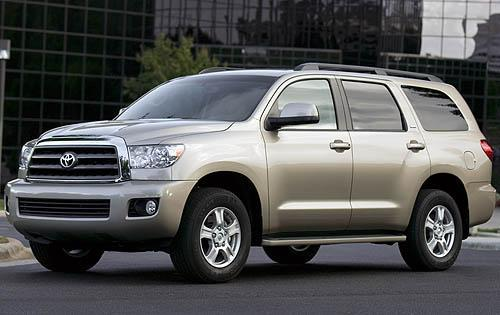

APRES : 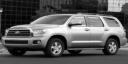

In [6]:
def BandWResizedOther(): # pareill que BandWResizedCar mais pour les images ne contenant pas de voitures
    path1 = 'Other/'   
    path2 = 'OtherGrey/'  
    listing = os.listdir(path1)   
    for i in range(len(listing) - 1) :
        I = imageio.imread(path1 + ' (' + str(i+1) + ').jpg')
        if(len(I.shape)==3):
            r,g,b=I[:,:,0], I[:,:,1], I[:,:,2]
            Igrey= 0.2989*r+0.5870*g+0.1140*b
            path=path2+str(i+1)+".jpg"
            resized = skimg.resize(Igrey, (64,128))
            imageio.imwrite(path,resized)

In [7]:
def BandWResizedALL(): # fonctione qui recadre et mets en noir et blanc toutes les images 
    BandWResizedCar()
    BandWResizedOther()


In [38]:
#BandWResizedALL() ##les images sont déja modifié dans le dataframe 

Les erreurs sont du a la conversion d'image en noir et blanc, avec l'operation que nous faisons, les données sont en float, c'est pourquoi pyhton les arondie à l'entier le plus proche 

In [39]:
loadAndSave()

In [9]:
def loadAll(): #fonction qui charge dans un dataframe toutes les images 
    dfcar = pd.read_hdf('allcarGreydata.h5', 'df')# chargement des voitures
    dfother = pd.read_hdf('OtherGreydata.h5', 'df')#chargement des autres images 
    dfcar['type']=1 # lorque c'est une voiture, elle a l'etiquette 'type' a 1
    dfother['type']=0 # l'etiquette est à 0 quand ce n'est pas une voiture
    dfAll = pd.concat([dfcar, dfother])
    return dfAll

In [10]:
dfAll = loadAll() # chargement des données 

In [40]:
dfAll.to_hdf("Alldata.h5", key='df', mode='w') #permet d'enregistrer le dataset complet

In [36]:
dfAll = pd.read_hdf('Alldata.h5', 'df') # permet de lire le dataset complet

In [37]:
print(dfAll.shape)

(5187, 8193)


In [10]:
print(dfAll)

      0    1    2    3    4    5    6    7    8    9  ...  8183  8184  8185  \
0    39   42   42   41   39   86  142  127  133  139  ...   203   196   188   
0    39   42   42   41   39   86  142  127  133  139  ...   203   196   188   
0   213  134  145  165  197  190  157  137  138  135  ...   230   220   230   
0   163  163  163  163  163  163  163  163  164  164  ...    96    79    92   
0   164  165  166  168  170  171  172  173  177  178  ...   175   175   175   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
0    88   85   81   77   75   74   74   74   76   76  ...    16    18    21   
0    52   54   58   62   65   67   67   67   65   63  ...    39    46    52   
0   110  112  115  118  122  126  129  131  132  133  ...   242   243   243   
0   208  209  209  210  212  214  216  217  218  219  ...    12    14    14   
0     2    2    2    1    1    1    0    0    1    1  ...     0     2     1   

    8186  8187  8188  8189  8190  8191  type  
0   

In [11]:
dfAll.iloc[:,-1].shape # verification qu'il y est bien une colonne type a chaque ligne 


(5187,)

## Separation des données en données de tests(25%) et d'entrainement (75%)

In [12]:
#dfAll.loc[:,dfAll.columns!='model']

Xtrain, Xtest, ytrain, ytest = train_test_split(dfAll.loc[:,dfAll.columns!='type'], dfAll["type"],test_size=0.25, random_state=0)


verification de la separation des données

In [13]:
print(dfAll.shape)
print(Xtrain.shape)
print(Xtest.shape)
print('pourcentage:' ,Xtrain.shape[0]/dfAll.shape[0])

(5187, 8193)
(3890, 8192)
(1297, 8192)
pourcentage: 0.7499518025833816


In [14]:
print(Xtrain)

    0     1     2     3     4     5     6     7     8     9     ...  8182  \
0    207   208   208   209   210   211   212   212   215   215  ...   214   
0     95   101   110   117   123   127   130   133   139   141  ...     4   
0     11     8     6     6     6     6     6     8     7     7  ...   112   
0    232   232   231   230   229   229   228   228   227   226  ...   130   
0    200   234   245   246   226   242   237   234   236   236  ...   238   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
0     69    55    48    59    77    86    83    79    87   102  ...    10   
0     67    66    65    65    67    69    72    74    70    71  ...    40   
0    107   107   108   109   110   111   112   112   110   111  ...   145   
0     95    95    97    99   101   103   105   106   107   107  ...   143   
0     72    58    40    32    37    46    52    54    45    34  ...    56   

    8183  8184  8185  8186  8187  8188  8189  8190  8191  
0    212   204  

## 1er model : Arbre de décision

Tout dabord on essaye avec les parametre par defaut

In [15]:
arbre = DecisionTreeClassifier()
clftree = arbre.fit(Xtrain, ytrain)
ypredit = clftree.predict(Xtest)
res = accuracy_score(ytest, ypredit)
print(res)

0.7686969930609098


## 2eme model : KNN (voisin le plus proche)

Tout dabord on essaye avec les parametre par defaut

In [35]:

KNN = KNeighborsClassifier()
clfKNN = KNN.fit(Xtrain, ytrain)
ypredit = clfKNN.predict(Xtest)
res = accuracy_score(ytest, ypredit)

print(res)

0.6954510408635313


## 3eme modele : SVM 

Tout dabord on essaye avec les parametre par defaut

In [28]:
classif = svm.SVC()
clf = classif.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
print(accuracy_score(ytest, ypredit))

0.8774094063222821


In [29]:
ypredit = clf.predict(Xtest)
print(metrics.confusion_matrix(ytest, ypredit))

[[563  93]
 [ 66 575]]


## LES DEUX TESTS SUIVANT ONT ETE EFFECTUEs AVEC LE MODELE SVM JUSTE AU DESSUS

#### Cette algorithme ouvre des photos sans voiture et fait une prediction avec le classifieur. le résultat devrait être une suite de 0

In [35]:
t = 8192

for i in range(15) :
    
    I = im.imread("testOther/ ("+ str(i+1)+").jpg")
    r,g,b=I[:,:,0], I[:,:,1], I[:,:,2]
    Igrey= 0.2989*r+0.5870*g+0.1140*b
    img = skimg.resize(Igrey, (64,128))
    img = np.resize(img,(1,t))
    predict = clf.predict(img)
    print(predict)
    #print(i+1)



[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]


On observe que le résultat n'est pas parfait mais assez concluant sur l'efficacité du classifieur

#### Cette algorithme ouvre des photos avec des voiture et fait une prediction avec le classifieur. le résultat devrait être une suite de 1

In [32]:
t = 8192

for i in range(17) :
    
    I = im.imread("testCar/ ("+ str(i+1)+").jpg")
    r,g,b=I[:,:,0], I[:,:,1], I[:,:,2]
    Igrey= 0.2989*r+0.5870*g+0.1140*b
    img = skimg.resize(Igrey, (64,128))
    img = np.resize(img,(1,t))
    predict = clf.predict(img)
    print(predict)
    #print(i+1)


[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


Pareil pour ce test, il n'est pas parfait mais assez satisfaisant 

# RECHERCHE DES PARAMETRES IDEAUX POUT LES TROIS MODELES

## 1) KNN

0.71781033153431
nombre de voisin pour atteindre le meilleur resultat 1


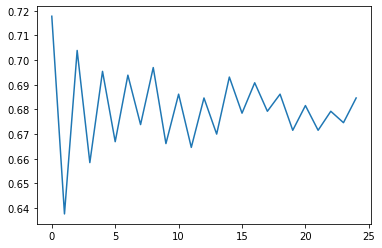

In [18]:
imax=0
n = 25
res=np.zeros(n)
for i in range(n) :
    KNN = KNeighborsClassifier((i+1))
    clf = KNN.fit(Xtrain, ytrain)
    ypredit = clf.predict(Xtest)
    res[i] = accuracy_score(ytest, ypredit)
    if(res[i]>res[imax]) :
        imax=i
    
plt.plot(res)
print(max(res))
bestParam = imax+1
print("nombre de voisin pour atteindre le meilleur resultat "+ str(bestParam))

Nous allons donc creer le modele avec le meilleur parametre et on verifie qu'on trouve bien la meme accuracy . 

In [20]:
KNN = KNeighborsClassifier(bestParam)
clf = KNN.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
print(accuracy_score(ytest, ypredit))

0.71781033153431


On fait la matrice de confusion

In [21]:
print(metrics.confusion_matrix(ytest, ypredit))

[[620  36]
 [330 311]]


On observe que le modele trouve les voitures lorsqu'il y en a une une fois sur deux environ

## 2) Abre de decision

0.787201233616037
Le meilleur parametre est :8


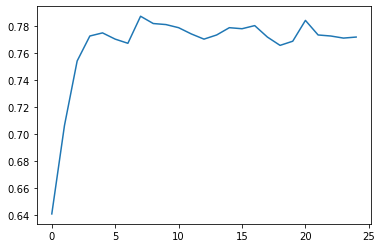

In [16]:
n=25
res=np.zeros(25)
imax=0

for i in range(25) :
    arbre = DecisionTreeClassifier(random_state=0, max_depth=i+1)
    clf = arbre.fit(Xtrain, ytrain)
    ypredit = clf.predict(Xtest)
    res[i] = accuracy_score(ytest, ypredit)
    if(res[i]>res[imax]) :
        imax=i
    
plt.plot(res)
print(max(res))
bestParam = imax+1
print("Le meilleur parametre est :" + str(bestParam))

In [17]:
print(metrics.confusion_matrix(ytest, ypredit))

[[500 156]
 [140 501]]


On observe que le model se trompe autant sur les images de voitures que les autres, avec un taux d'erreur de 21% environ

## 3) SVM

0
1
2
3
4
5
6
7
8
9
0.49421742482652276
Le meilleur parametre est :3.138054305912596e-08


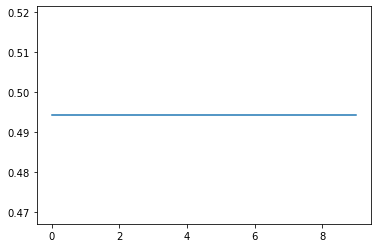

In [26]:
n=10
res=np.zeros(n)
imax = 0

for i in range(n) :
    classif = svm.SVC(gamma=1/(Xtrain.shape[0]*Xtrain.shape[1]*10**n))
    clf = classif.fit(Xtrain, ytrain)
    ypredit = clf.predict(Xtest)
    res[i] = accuracy_score(ytest, ypredit)
    print(i)
    if(res[i]>res[imax]) :
        imax=i
    
plt.plot(res)
print(max(res))
bestParam = 1/(Xtrain.shape[0]*Xtrain.shape[1]*10**imax)
print("Le meilleur parametre est :" + str(bestParam))

On observe que essayer de trouver le bon parametre pour augmenter l'accuracy c'est pas simple, en effet le modele avec les parametre de base est plus efficace (gamma = 1/(nbligne Xtrain * nbColonne Xtrain)

# CONCLUSIONS

Pour conclure, nous avons pus observé tout au long de ce projet que chaque détails est important, du choix des données au choix du modele. Il faut aussi trouver les bons parametres pour optimiser le modeles que l'on choisi, dans notre cas le modele idéal est le modele SVM avec les parametres par défaut.